In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

import statsmodels.regression.linear_model as smf

In [15]:
from rdd import rdd


In [11]:
practice_data = pd.read_csv('/Users/danieltom/Desktop/data/DataSet(1).csv')

In [13]:
practice_data

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger
...,...,...,...,...,...,...,...,...,...
245,246,Rainforest Cafe,NaN,129,-10.4%,18,-5.3%,NaN,Varied Menu
246,247,PDQ,NaN,127,-5.5%,56,-11.1%,NaN,Chicken
247,248,Lupe Tortilla,NaN,127,12.1%,25,8.7%,NaN,Mexican
248,249,Cook-Out Restaurant,NaN,126,10.1%,270,7.1%,NaN,Burger


In [31]:
bandwidth_opt = rdd.optimal_bandwidth(practice_data['Sales'], practice_data['Units'], cut=100)
print("Optimal bandwidth:", bandwidth_opt)

Optimal bandwidth: 91.47406888690907


In [32]:
data_rdd = rdd.truncated_data(practice_data, 'Units', bandwidth_opt, cut=100)


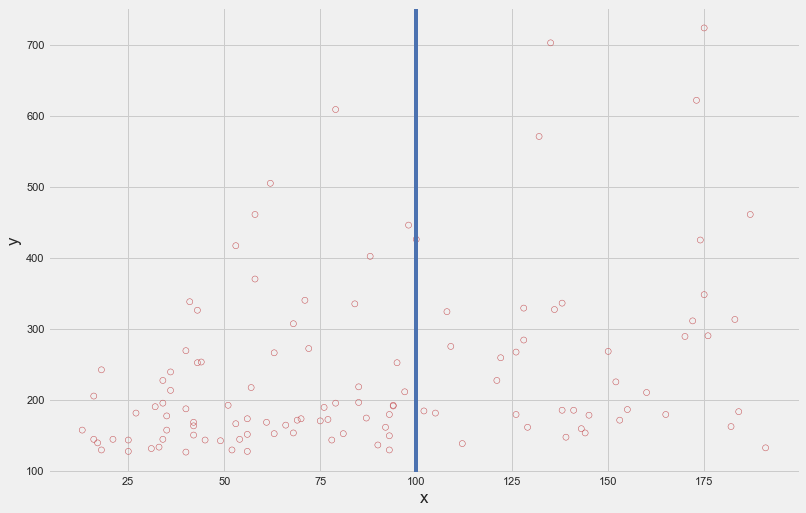

In [34]:
plt.figure(figsize=(12, 8))
plt.scatter(data_rdd['Units'], data_rdd['Sales'], facecolors='none', edgecolors='r')
plt.xlabel('x')
plt.ylabel('y')
plt.axvline(x=100, color='b')
plt.show()
plt.close()

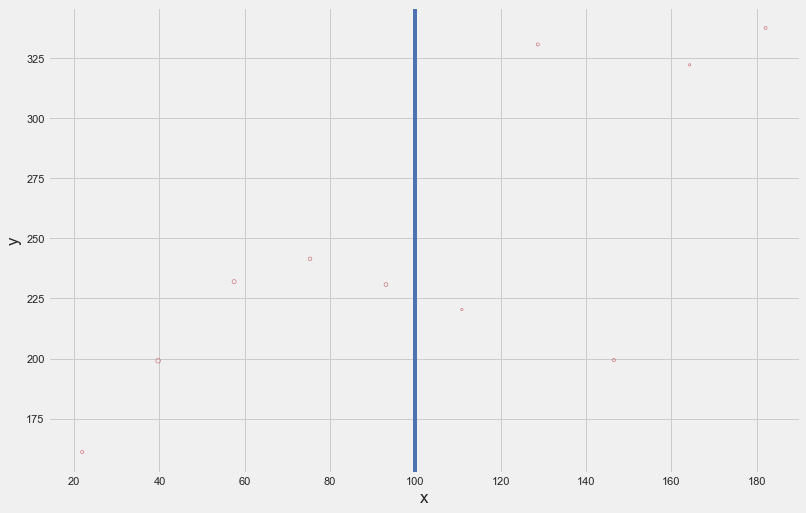

In [53]:
data_binned = rdd.bin_data(data_rdd, 'Sales', 'Units', 10)

plt.figure(figsize=(12, 8))
plt.scatter(data_binned['Units'], data_binned['Sales'],
    s = data_binned['n_obs'], facecolors='none', edgecolors='r')
plt.axvline(x=100, color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
plt.close()

#y = sales
#x = units

In [3]:
def Visualizing_Data_At_Threshold (data, threshold, running_variable, outcome_variable):
    #set the running variable's threshold
    data[running_variable] -= threshold
    
    #visualize data with threshold
    plt.figure(figsize=(8,8))
    ax = plt.subplot(3,1,1)
    data.plot.scatter(x=running_variable, y=outcome_variable, ax=ax)
    plt.title("Running Variable (Centered at 0)")
    

In [56]:
def Restricting_Binning_Data(data, threshold, running_variable, outcome_variable):
    #restricting and binning the data
    optimal_bandwidth = rdd.optimal_bandwidth(data[outcome_variable], data[running_variable], cut=threshold)
    #bandwidth_opt = rdd.optimal_bandwidth(practice_data['Sales'], practice_data['Units'], cut=100)

    restricted_data = rdd.truncated_data(data, running_variable, optimal_bandwidth, cut=threshold)
    #data_rdd = rdd.truncated_data(practice_data, 'Units', bandwidth_opt, cut=100)

    ######data_binned = rdd.bin_data(restricted_data, outcome_variable, running_variable, 100)
    #data_binned = rdd.bin_data(data_rdd, 'Sales', 'Units', 10)

    #plt.figure(figsize=(12, 8))
    #plt.scatter(data_binned['Units'], data_binned['Sales'],
        #s = data_binned['n_obs'], facecolors='none', edgecolors='r')
    #plt.axvline(x=100, color='b')
    #plt.xlabel('x')
    #plt.ylabel('y')
    #plt.show()
    #plt.close()

    #y = sales
    #x = units
    
    #visualizing the restricted and binned data

    
    
    #plt.scatter(data_rdd['Units'], data_rdd['Sales'], facecolors='none', edgecolors='r')
    
    
    plt.figure(figsize=(12, 8))
    plt.scatter(restricted_data[running_variable], restricted_data[outcome_variable], facecolors='none', edgecolors='r')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axvline(x=100, color='b')
    plt.show()
    plt.close()
                
            


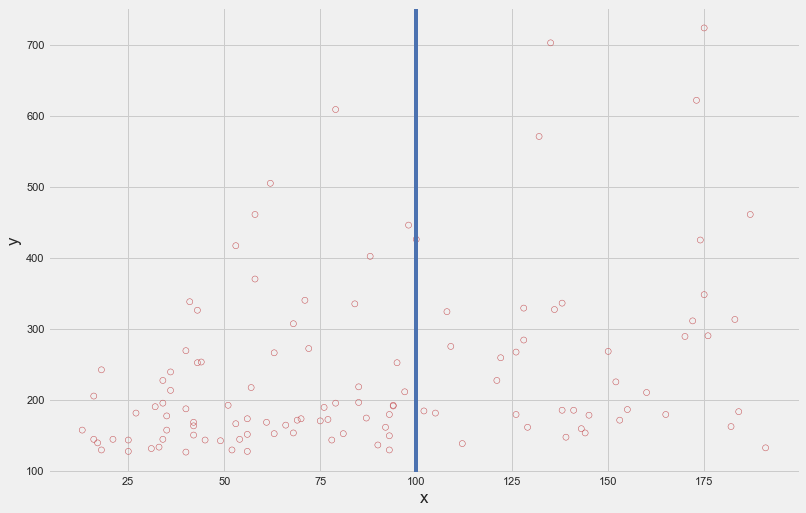

In [55]:
Restricting_Binning_Data(practice_data, 100, 'Units', 'Sales')

In [5]:
def Estimating_Effect (data, threshold, running_variable, outcome_variable):
    #creating a table that estimates the effect of the the treatment on the running variable at the threshold
    rdd_df = data.assign(threshold=(data[running_variable] > 0).astype(int))
    model = smf.wls("all~running_variable*threshold", rdd_df).fit()
    model.summary().tables[1]
    

In [6]:
def Graphing_Running_Variable(data, threshold, running_variable, outcome_variable): 
    #create a scatter plot of the running variable values 
    ax = data.plot.scatter(x=running_variable, y=outcome_variable, color="C0")
    data.assign(predictions=model.fittedvalues).plot(x=running_variable, y="predictions", ax=ax, color="C1")
    plt.title("Regression Discontinuity");
    

In [7]:
def Triangular_Kernel_Weighting(data, threshold, running_variable, outcome_variable): 
    #helper function that does triangular kernel weighting
    def kernel(R, c, h):
        indicator = (np.abs(R-c) <= h).astype(float)
        return indicator * (1 - np.abs(R-c)/h)
    
    #plotting the original data with triangular kernel weighting applied to it
    plt.plot(data[running_variable], kernel(data[running_variable], c=0, h=1))
    plt.xlabel(running_variable)
    plt.ylabel("Weight")
    plt.title("Kernel Weight by Running Variable");
    
    

In [8]:
def Estimating_Effects_With_Kernel(data, threshold, running_variable, outcome_variable): 
    model = smf.wls("all~running_variable*threshold", rdd_df,
                weights=kernel(data[running_variable], c=0, h=1)).fit()

    model.summary().tables[1]

In [9]:
def Sheepskin_Effect(data, threshold, running_variable, outcome_variable): 
    data.plot.scatter(x=running_variable, y=outcome_variable, figsize=(10,5))
    plt.xlabel("Running Variable")
    plt.ylabel("Outcome Variable")


In [10]:
def McCray_Test(data, threshold, running_variable, outcome_variable): 
    plt.figure(figsize=(8,8))
    data['n'] = data[running_variable].value_counts
    ax = plt.subplot(2,1,1)
    data.plot.bar(x=running_variable, y="n", ax=ax)
    plt.title("McCrary Test")
    plt.ylabel("Smoothness at the Threshold")

    ax = plt.subplot(2,1,2, sharex=ax)
    data.replace({1877:1977, 1874:2277}).plot.bar(x=running_variable, y="n", ax=ax)
    plt.xlabel("Running Variable Relative to Cut off")
    plt.ylabel("Spike at the Threshold");